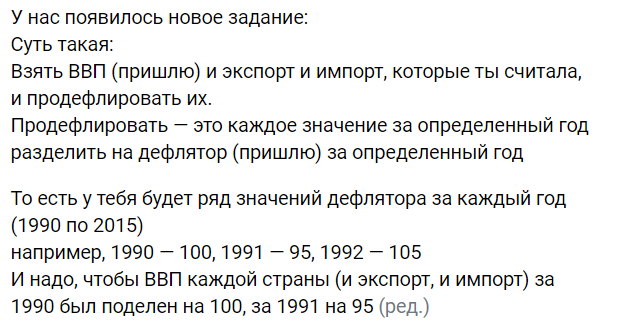

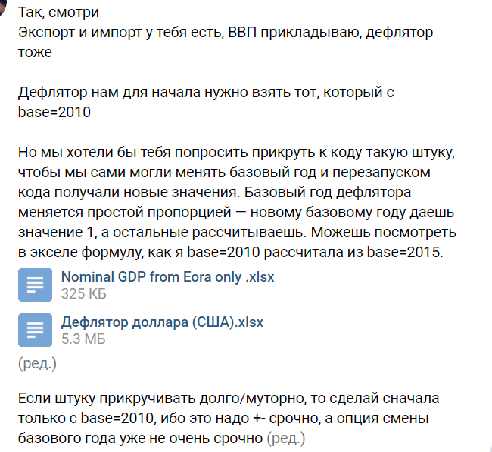

In [1]:
import pandas as pd
import numpy as np

In [2]:
defl = pd.read_excel("Deflyator_dollara_SShA.xlsx")
defl = defl.drop([30, 31, 32])
defl.head()

,Year,Deflator (base = 2015),Deflator (base = 2010)
0,1990.0,0.607617,0.662481
1,1991.0,0.628165,0.684884
2,1992.0,0.642481,0.700492
3,1993.0,0.657703,0.717089
4,1994.0,0.671747,0.732402


In [3]:
my_import = pd.read_excel('all_import.xlsx')
my_export = pd.read_excel('all_export.xlsx')
my_export.head()

,year,0,country
0,2000,299354.004676,Afghanistan
1,2001,191700.227525,Afghanistan
2,2002,207992.254936,Afghanistan
3,2003,257450.410652,Afghanistan
4,2004,273809.119169,Afghanistan


по базе 2010

In [4]:
my_defl = defl[["Deflator (base = 2010)"]]
my_defl.index = defl["Year"]
my_defl.head(11)

,Deflator (base = 2010)
Year,
1990.0,0.662481
1991.0,0.684884
1992.0,0.700492
1993.0,0.717089
1994.0,0.732402
1995.0,0.747759
1996.0,0.761450
1997.0,0.774581
1998.0,0.783299


In [5]:
defl_import = my_import.apply(lambda x: x[0]/my_defl.loc[x["year"]], axis = 1)
defl_export = my_export.apply(lambda x: x[0]/my_defl.loc[x["year"]], axis = 1)
defl_export.head()

,Deflator (base = 2010)
0,368494.009191
1,230911.217665
2,246634.496305
3,299715.331619
4,310402.899517


In [6]:
my_import[0] = defl_import
my_export[0] = defl_export
my_export

,year,0,country
0,2000,3.684940e+05,Afghanistan
1,2001,2.309112e+05,Afghanistan
2,2002,2.466345e+05,Afghanistan
3,2003,2.997153e+05,Afghanistan
4,2004,3.104029e+05,Afghanistan
...,...,...,...
3035,2011,3.702552e+05,Zimbabwe
3036,2012,6.252969e+05,Zimbabwe
3037,2013,5.799087e+05,Zimbabwe
3038,2014,2.353524e+06,Zimbabwe


In [7]:
my_import.to_excel('defl_import.xlsx', index = False, encoding = 'utf-8')
my_export.to_excel('defl_export.xlsx', index = False, encoding = 'utf-8')

In [8]:
gdp = pd.read_excel("Nominal_GDP_from_Eora_only.xlsx")
gdp

,Страна,Год,Показатель,Источник,Размерность,Значение,EU-28,EU-15,EU-13,SSA-22,CEE,Данные для статистики
0,Afghanistan,1989,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1989
1,Afghanistan,1990,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1990
2,Afghanistan,1991,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1991
3,Afghanistan,1992,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1992
4,Afghanistan,1993,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1993
...,...,...,...,...,...,...,...,...,...,...,...,...
5447,SSA-22,2013,ВВП,authors',млрд. долларов,1501.002796,NaN,NaN,NaN,NaN,NaN,SSA-222013
5448,SSA-22,2014,ВВП,authors',млрд. долларов,1571.725324,NaN,NaN,NaN,NaN,NaN,SSA-222014
5449,SSA-22,2015,ВВП,authors',млрд. долларов,1409.256434,NaN,NaN,NaN,NaN,NaN,SSA-222015
5450,SSA-22,2016,ВВП,authors',млрд. долларов,1309.571312,NaN,NaN,NaN,NaN,NaN,SSA-222016


In [11]:
def foo(x):
    if x["Год"] >= 1990:
        return float(x["Значение"] / my_defl.loc[x["Год"]])

In [12]:
my_gdp = gdp.apply(foo, axis = 1)
my_gdp

0               NaN
1          0.000000
2          0.000000
3          0.000000
4          0.000000
           ...     
5447    1417.742350
5448    1456.977478
5449    1292.548289
5450    1188.126169
5451    1249.411391
Length: 5452, dtype: float64

In [13]:
gdp["Значение"] = my_gdp # defl_gdp

In [14]:
gdp

,Страна,Год,Показатель,Источник,Размерность,Значение,EU-28,EU-15,EU-13,SSA-22,CEE,Данные для статистики
0,Afghanistan,1989,ВВП,Eora(GDP_MilUSD),млрд. долларов,NaN,,,,,,Afghanistan1989
1,Afghanistan,1990,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1990
2,Afghanistan,1991,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1991
3,Afghanistan,1992,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1992
4,Afghanistan,1993,ВВП,Eora(GDP_MilUSD),млрд. долларов,0.000000,,,,,,Afghanistan1993
...,...,...,...,...,...,...,...,...,...,...,...,...
5447,SSA-22,2013,ВВП,authors',млрд. долларов,1417.742350,NaN,NaN,NaN,NaN,NaN,SSA-222013
5448,SSA-22,2014,ВВП,authors',млрд. долларов,1456.977478,NaN,NaN,NaN,NaN,NaN,SSA-222014
5449,SSA-22,2015,ВВП,authors',млрд. долларов,1292.548289,NaN,NaN,NaN,NaN,NaN,SSA-222015
5450,SSA-22,2016,ВВП,authors',млрд. долларов,1188.126169,NaN,NaN,NaN,NaN,NaN,SSA-222016


In [15]:
gdp.to_excel('defl_gdp.xlsx', index = False, encoding = 'utf-8')